In [2]:
import pandas as pd
import numpy as np

url1 = 'https://raw.githubusercontent.com/foorilla/freshremote-work-salaries/main/salaries.csv'
url2 = 'https://raw.githubusercontent.com/edb-313/Data_Science_salaries/main/Data/Salaries.csv'

df = pd.concat([pd.read_csv(url1),pd.read_csv(url2)])

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Unnamed: 0
0,2022,SE,FT,Training Coordinator,75000,USD,75000,US,0,US,M,NaN
1,2022,SE,FT,Backend Software Engineer,210000,USD,210000,US,100,US,L,NaN
2,2022,EN,FT,Operations Specialist,46000,USD,46000,US,100,US,L,NaN
3,2022,SE,FT,Principal Software Engineer,230000,USD,230000,US,100,US,L,NaN
4,2022,SE,FT,Account Executive,98000,USD,98000,US,100,US,L,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16623 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           16623 non-null  int64  
 1   experience_level    16623 non-null  object 
 2   employment_type     16623 non-null  object 
 3   job_title           16623 non-null  object 
 4   salary              16623 non-null  int64  
 5   salary_currency     16623 non-null  object 
 6   salary_in_usd       16623 non-null  int64  
 7   employee_residence  16623 non-null  object 
 8   remote_ratio        16623 non-null  int64  
 9   company_location    16623 non-null  object 
 10  company_size        16623 non-null  object 
 11  Unnamed: 0          607 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.6+ MB


# Data Cleaning

In [2]:
# Define the keywords to filter for
keywords = ['Data', 'Machine learning','AI']

# Join the keywords into a single string separated by pipe characters
keywords_str = '|'.join(keywords)

# Filter the 'job_title' column for rows containing the keywords
df = df[df['job_title'].str.contains(keywords_str)]

In [3]:
#removing duplicates if there are
df = df.drop_duplicates()

In [4]:
#Only fulltime employees (FT)
df = df[df['employment_type'] == "FT"]

In [5]:
#remove unneccesary columns
df = df.drop(['salary','salary_currency','Unnamed: 0','employment_type'],axis = 1)

In [6]:
#resetting the index
df = df.reset_index(drop=True)

In [7]:
#grouping Job titles into Job Groups
i = 0
for t in df['job_title']:
    if 'Analyst' in t or 'Analytics' in t:
        df.at[i,'job_group'] = 'Data Analyst'
    elif 'Learning' in t or 'AI' in t:
        df.at[i,'job_group'] = 'Machine Learning'
    elif 'Engineer' in t or 'ETL' in t:
        df.at[i,'job_group'] = 'Data Engineer'
    elif 'Science' in t or 'Scientist' in t:
        df.at[i,'job_group'] = 'Data Science'
    elif 'Architect' in t:
        df.at[i,'job_group'] = 'Data Architect'
    else:
        df.at[i,'job_group'] = 'Head of Data'
    i += 1

In [8]:
#Checking that there are no empty values in Job Group column
df['job_group'].isnull().sum()

0

# Data Visualizations

### 1. Rank in descending order the average salary of Data Scientists by country (regardless of job title and experience level)

In [9]:
country_counts = df['company_location'].value_counts()
country_counts

US    791
GB     85
CA     49
DE     43
IN     40
ES     30
FR     28
GR     18
AU      8
AT      7
BR      7
PL      6
TR      6
PT      6
SG      5
MX      5
NG      4
LU      4
NL      4
DK      4
PK      3
JP      3
CL      3
NZ      3
RU      3
AS      3
HU      3
MT      2
KE      2
RO      2
UA      2
IL      2
AR      2
EE      2
SI      2
BE      2
PR      2
CH      2
MY      2
AE      1
IR      1
MD      1
HN      1
DZ      1
IE      1
IT      1
CZ      1
ID      1
PH      1
SK      1
VN      1
Name: company_location, dtype: int64

In [10]:
# Filter the dataframe to keep only the rows for countries_to_keep
df_country_count = df[df['company_location'].isin(country_counts[country_counts >= 10].index)]

In [11]:
# Calculate the average salary by country and sort in descending order
avg_salary_country = df_country_count.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=True)

Text(0.5, 1.0, 'Top 5 Countries with Highest Average Salary for Data Scientists')

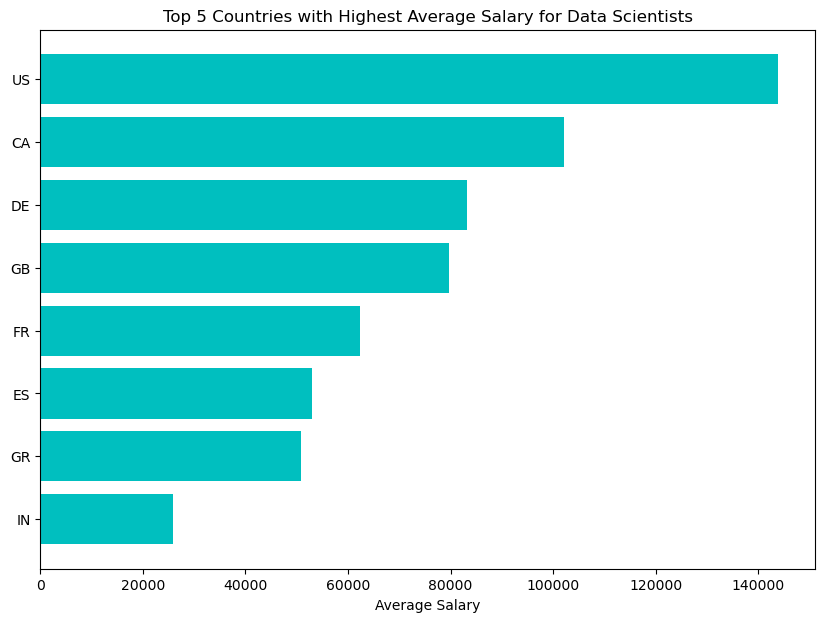

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(avg_salary_country.index, avg_salary_country.values, color='c')

# Set the x-axis label
ax.set_xlabel('Average Salary')

# Set the title of the plot
ax.set_title('Top 5 Countries with Highest Average Salary for Data Scientists')


### 2. Rank in descending order the average salary of Data Scientists by job title & job group 

In [13]:
titles_count = df['job_title'].value_counts()

In [14]:
# Filter the dataframe to keep only the titles that appear 5 or more times
df_titles_count = df[df['job_title'].isin(titles_count[titles_count >= 5].index)]

Text(0.5, 1.0, 'Top 10 titles with Highest Average Salary')

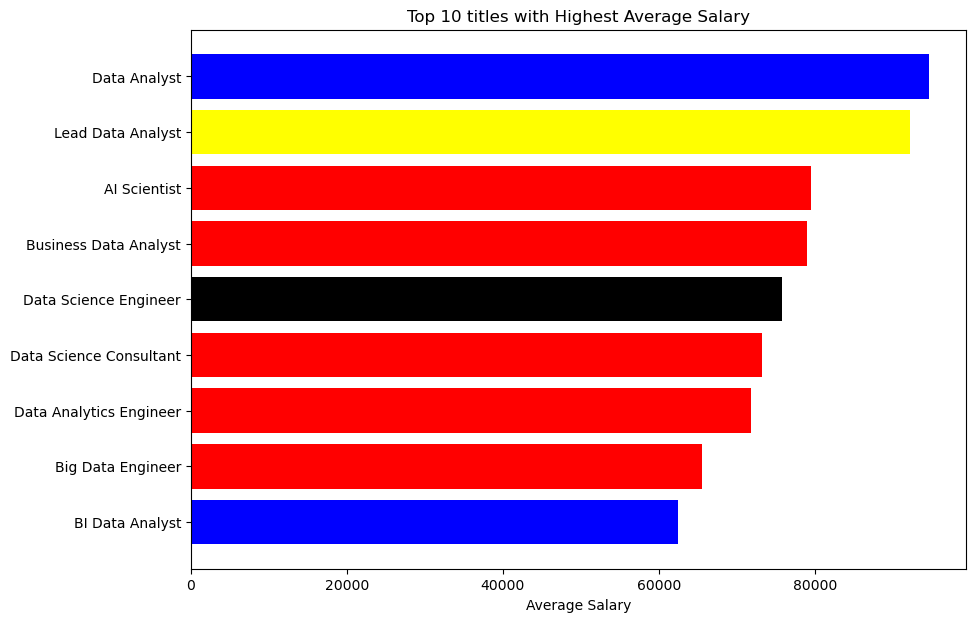

In [15]:
avg_salary_title = df_titles_count.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True)

# Select the top 10 titles with the highest average salary
top_10_titles = avg_salary_title[:9]

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(top_10_titles.index, top_10_titles.values, color=['blue','red','red','red','black','red','red','yellow','blue'])

#ax.legend(['blue', 'red', 'yellow','black'], ['Engineer', 'Data Scientist', 'Head of Data','Data Architect'])
# Set the x-axis label
ax.set_xlabel('Average Salary')

# Set the title of the plot
ax.set_title('Top 10 titles with Highest Average Salary')


In [16]:
group_count = df['job_group'].value_counts()
group_count

Data Science        425
Data Engineer       397
Data Analyst        298
Data Architect       40
Head of Data         31
Machine Learning     16
Name: job_group, dtype: int64

Text(0.5, 1.0, 'Highest Average Salary by Group')

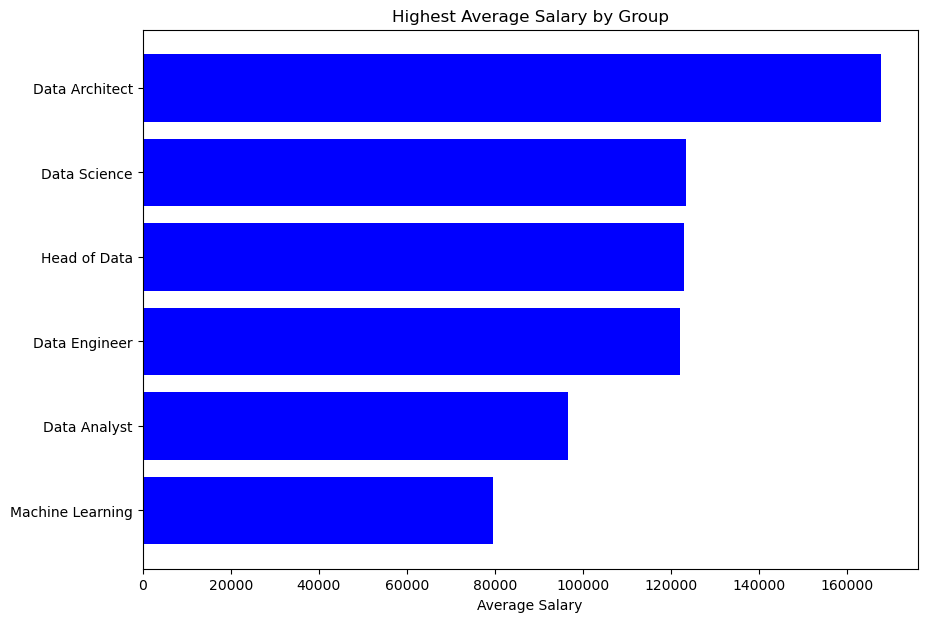

In [17]:
avg_salary_group = df.groupby('job_group')['salary_in_usd'].mean().sort_values(ascending=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(avg_salary_group.index, avg_salary_group.values, color=['blue'])

# Set the x-axis label
ax.set_xlabel('Average Salary')

# Set the title of the plot
ax.set_title('Highest Average Salary by Group')

### 3.Does the company size affect the average salary (keeping the same experience level and job title)?

In [18]:
size_counts = df['company_size'].value_counts()
size_counts

M    725
L    364
S    118
Name: company_size, dtype: int64

In [19]:
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size_num'] = df['company_size'].map(size_mapping)

In [20]:
# Calculate the correlation coefficient between company size and salary
correlation = df['company_size_num'].corr(df['salary_in_usd'])

print('Correlation between company size and salary:', round(correlation,3))

Correlation between company size and salary: 0.104


Text(0.5, 1.0, 'Average Salary by Company Size')

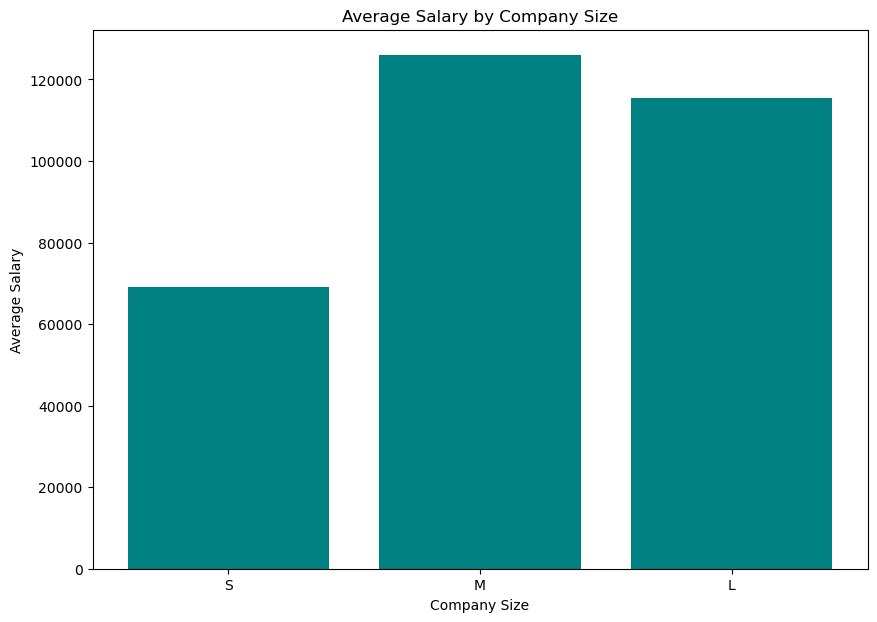

In [21]:
avg_salary_size = df.groupby('company_size_num')['salary_in_usd'].mean()

# Create a bar chart of average salary by company size
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(avg_salary_size.index, avg_salary_size.values, color='teal')

# Set the x-axis label
ax.set_xlabel('Company Size')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['S', 'M', 'L'])

# Set the y-axis label
ax.set_ylabel('Average Salary')
# Set the title of the plot
ax.set_title('Average Salary by Company Size')

### 4. Of the companies that employee data scientists what percentage are small, medium, and large?

In [22]:
# Count the number of companies in each size category
size_counts = df['company_size'].value_counts()

# Calculate the total number of companies
total_companies = size_counts.sum()

# Calculate the percentage of companies in each size category
percent_small = size_counts['S'] / total_companies * 100
percent_medium = size_counts['M'] / total_companies * 100
percent_large = size_counts['L'] / total_companies * 100

# Round the percentages to two decimal places and add the percent sign
percent_small_formatted = '{:.2f}%'.format(round(percent_small, 2))
percent_medium_formatted = '{:.2f}%'.format(round(percent_medium, 2))
percent_large_formatted = '{:.2f}%'.format(round(percent_large, 2))

# Print the results
print('Percentage of companies that are small:', percent_small_formatted)
print('Percentage of companies that are medium:', percent_medium_formatted)
print('Percentage of companies that are large:', percent_large_formatted)

Percentage of companies that are small: 9.78%
Percentage of companies that are medium: 60.07%
Percentage of companies that are large: 30.16%


### 5. Rank in descending order the remote work ratio by job title

In [23]:
titles_count[titles_count.values>=5]

Data Engineer                    321
Data Scientist                   318
Data Analyst                     214
Data Science Manager              39
Data Architect                    36
BI Data Analyst                   18
AI Scientist                      16
Data Science Consultant           15
Big Data Engineer                 15
Data Analytics Manager            13
Business Data Analyst             13
Director of Data Science          12
Lead Data Engineer                11
Principal Data Scientist          11
Database Reliability Engineer     10
Head of Data                      10
Data Engineering Manager          10
Applied Data Scientist            10
Data Analytics Engineer            9
Lead Data Scientist                8
Data Specialist                    7
Database Administrator             7
Head of Data Science               6
Data Science Engineer              6
Lead Data Analyst                  6
Cloud Data Engineer                5
Principal Data Engineer            5
N

In [24]:
# Calculate the mean remote work ratio by job title
remote_work_ratio = df_titles_count.groupby('job_title')['remote_ratio'].mean()

# Sort the results in descending order
remote_work_ratio_sorted = remote_work_ratio.sort_values(ascending=True)

# Print the results
print(remote_work_ratio_sorted)

job_title
Director of Data Science          54.166667
Lead Data Scientist               62.500000
Big Data Engineer                 63.333333
Head of Data Science              66.666667
Lead Data Engineer                72.727273
Applied Data Scientist            75.000000
Data Science Consultant           76.666667
BI Data Analyst                   77.777778
Data Scientist                    78.930818
Cloud Data Engineer               80.000000
Data Engineering Manager          80.000000
Data Science Engineer             83.333333
AI Scientist                      84.375000
Data Analyst                      86.682243
Data Engineer                     88.006231
Business Data Analyst             88.461538
Data Analytics Engineer           88.888889
Head of Data                      90.000000
Principal Data Scientist          90.909091
Data Science Manager              92.307692
Data Analytics Manager            92.307692
Database Administrator            92.857143
Database Reliability E

Text(0, 0.5, 'Job Title')

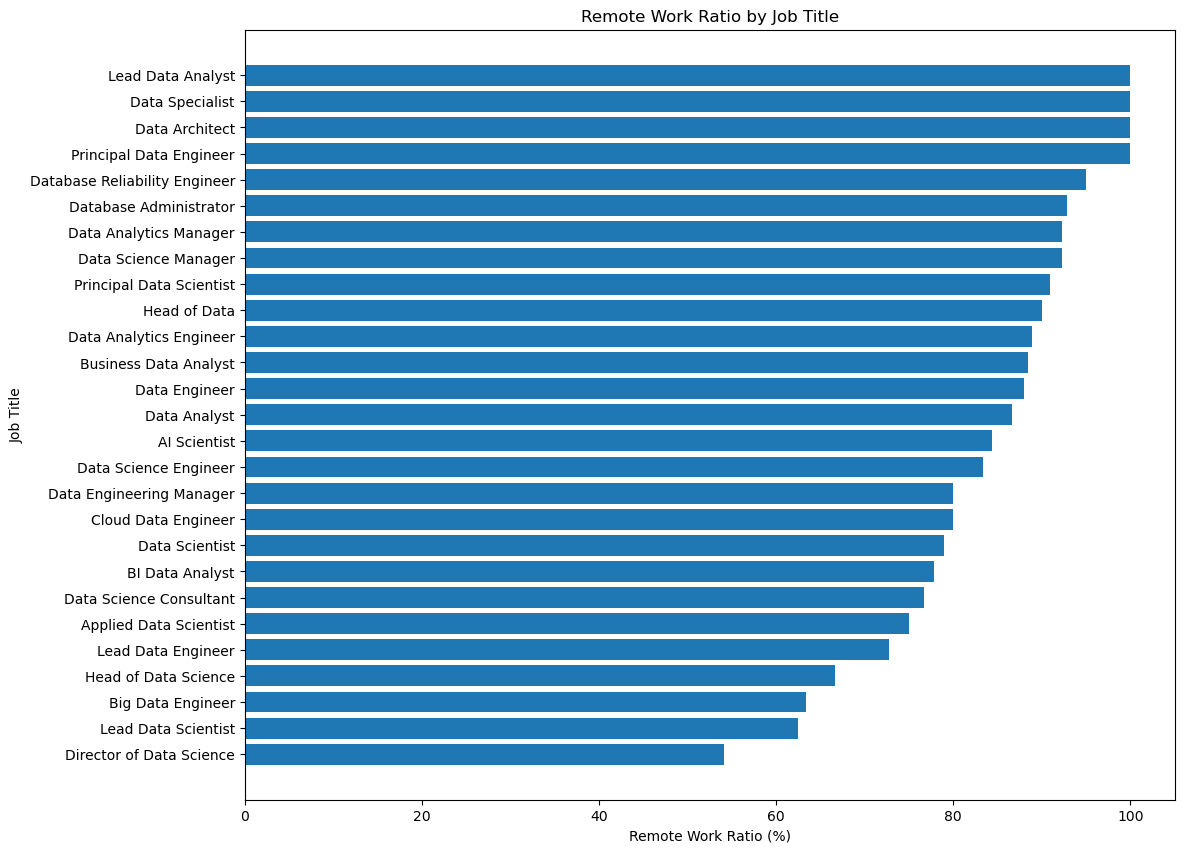

In [25]:
# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(remote_work_ratio_sorted.index, remote_work_ratio_sorted)

# Set the title and labels
ax.set_title('Remote Work Ratio by Job Title')
ax.set_xlabel('Remote Work Ratio (%)')
ax.set_ylabel('Job Title')

In [26]:
remote_work_ratio_sorted

job_title
Director of Data Science          54.166667
Lead Data Scientist               62.500000
Big Data Engineer                 63.333333
Head of Data Science              66.666667
Lead Data Engineer                72.727273
Applied Data Scientist            75.000000
Data Science Consultant           76.666667
BI Data Analyst                   77.777778
Data Scientist                    78.930818
Cloud Data Engineer               80.000000
Data Engineering Manager          80.000000
Data Science Engineer             83.333333
AI Scientist                      84.375000
Data Analyst                      86.682243
Data Engineer                     88.006231
Business Data Analyst             88.461538
Data Analytics Engineer           88.888889
Head of Data                      90.000000
Principal Data Scientist          90.909091
Data Science Manager              92.307692
Data Analytics Manager            92.307692
Database Administrator            92.857143
Database Reliability E

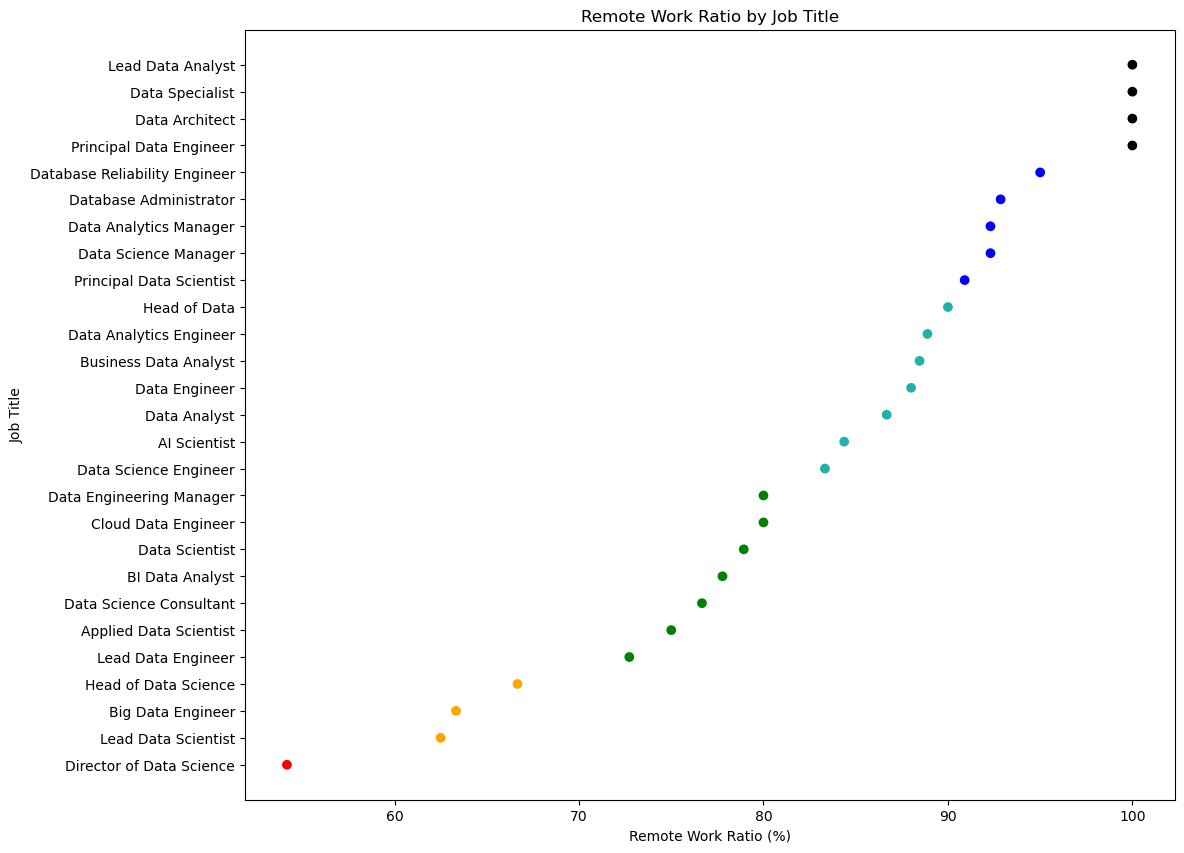

In [27]:
# Create a color list
colors = ['red' if 50 < ratio < 60 else 'orange' if 60 < ratio < 70 else 'green' if 70 < ratio <= 80 else 'lightseagreen' if 80 < ratio <= 90 else 'blue' if 90 < ratio < 100 else 'black' for ratio in remote_work_ratio_sorted.values]

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(remote_work_ratio_sorted.values, remote_work_ratio_sorted.index, color=colors)

# Set the title and labels
ax.set_title('Remote Work Ratio by Job Title')
ax.set_xlabel('Remote Work Ratio (%)')
ax.set_ylabel('Job Title')
#plt.text(0, 0.05, '0 No remote work (less than 20%) \n50 Partially remote \n100 Fully remote (more than 80%)', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom')

# Show the plot
plt.show()

### 6. Rank in descending order the remote work ratio by company size

Maybe it would make more sense to find the correlation between company size and work ratio?

In [28]:
# Calculate the mean remote work ratio by job title
remote_work_ratio_by_company = df.groupby('company_size')['remote_ratio'].mean()

# Sort the results in descending order
remote_work_ratio_by_company_sorted = remote_work_ratio_by_company.sort_values(ascending=False)

# Print the results
remote_work_ratio_by_company_sorted

company_size
M    88.758621
L    78.846154
S    77.118644
Name: remote_ratio, dtype: float64

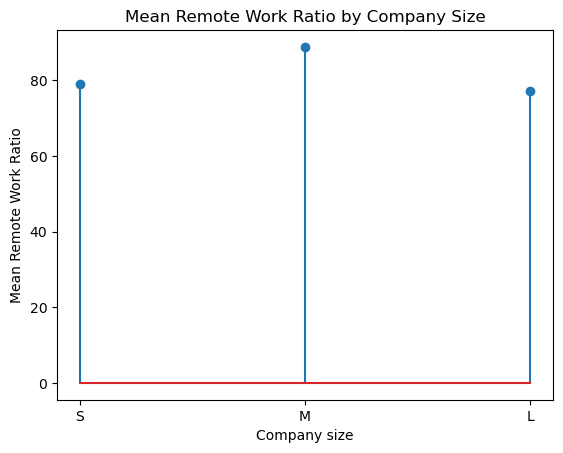

In [29]:
#plot a graph
#Create a stem plot of the mean remote work ratio by job title
plt.stem(remote_work_ratio_by_company)

plt.xlabel('Company size')
plt.xticks([0, 1, 2], ['S', 'M', 'L'])
plt.ylabel('Mean Remote Work Ratio')
plt.title('Mean Remote Work Ratio by Company Size')
#plt.ylim(65,75)
plt.show()

### 7. What is the annual trend of average salaries of Data scientists?

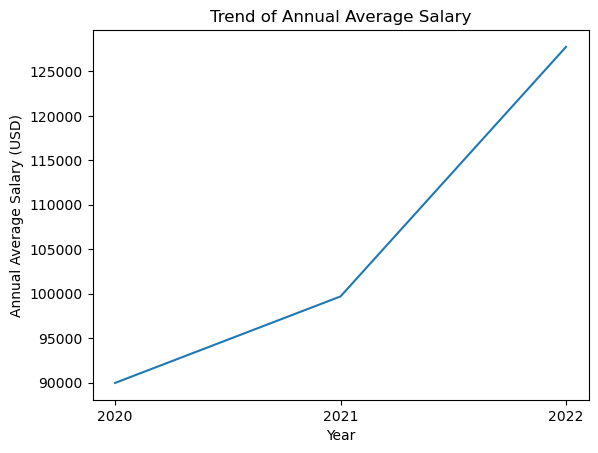

In [30]:
# Convert the 'work_year' column to a datetime object
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

# Calculate the annual average salary in USD
annual_avg_salary = df.groupby(df['work_year'].dt.year)['salary_in_usd'].mean()

# Format the yearly dates
yearly_dates = [pd.Period(year=year, freq='A') for year in annual_avg_salary.index]
yearly_dates_formatted = [date.strftime('%Y') for date in yearly_dates]

# Plot the trend of annual average salary
plt.plot(yearly_dates_formatted, annual_avg_salary.values)

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Annual Average Salary (USD)')
plt.title('Trend of Annual Average Salary')

# Show the plot
plt.show()

In [31]:
# Calculate the YoY change for each year
yoy_change = annual_avg_salary.pct_change()
yoy_change_formatted = yoy_change[1:].map(lambda x: f"{x:.2%}")
yoy_change_formatted

work_year
2021    10.80%
2022    28.13%
Name: salary_in_usd, dtype: object

### 8. Which Job title has seen the highest salary increase YoY?

In [32]:
# Group the data by job_title and year, and calculate the average salary for each group
avg_salary_by_job_year = df_titles_count.groupby(['job_title', df['work_year'].dt.year])['salary_in_usd'].mean()

# Calculate the YoY percentage change for each job_title
yoy_salary_change_by_job = avg_salary_by_job_year.groupby('job_title').pct_change(periods=1)

# Drop missing values
yoy_salary_change_by_job = yoy_salary_change_by_job.dropna()

# Find the job_title with the highest YoY percentage change
highest_yoy_jobs = yoy_salary_change_by_job.groupby('job_title').max().nlargest(10)

# Print the result
print(f"The top 10 job titles with the highest YoY percentage change are:\n{highest_yoy_jobs}")

The top 10 job titles with the highest YoY percentage change are:
job_title
Big Data Engineer                4.511779
AI Scientist                     2.076941
Applied Data Scientist           1.898814
Database Reliability Engineer    1.560436
Data Engineering Manager         1.311408
Lead Data Scientist              1.040950
Head of Data Science             1.009615
Data Scientist                   0.814815
Lead Data Engineer               0.773083
Data Analyst                     0.724896
Name: salary_in_usd, dtype: float64


### 9. For each job title, how does the average salary vary depending on experience level?

In [33]:
avg_salary_by_job_exp = df_titles_count.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean()
print(avg_salary_by_job_exp)

job_title                 experience_level
AI Scientist              EN                   41357.333333
                          EX                  200000.000000
                          MI                  147500.000000
                          SE                   55000.000000
Applied Data Scientist    EN                   80018.500000
                                                  ...      
Lead Data Scientist       SE                  107990.166667
Principal Data Engineer   EX                  600000.000000
                          SE                  192500.000000
Principal Data Scientist  MI                  151000.000000
                          SE                  183573.888889
Name: salary_in_usd, Length: 70, dtype: float64


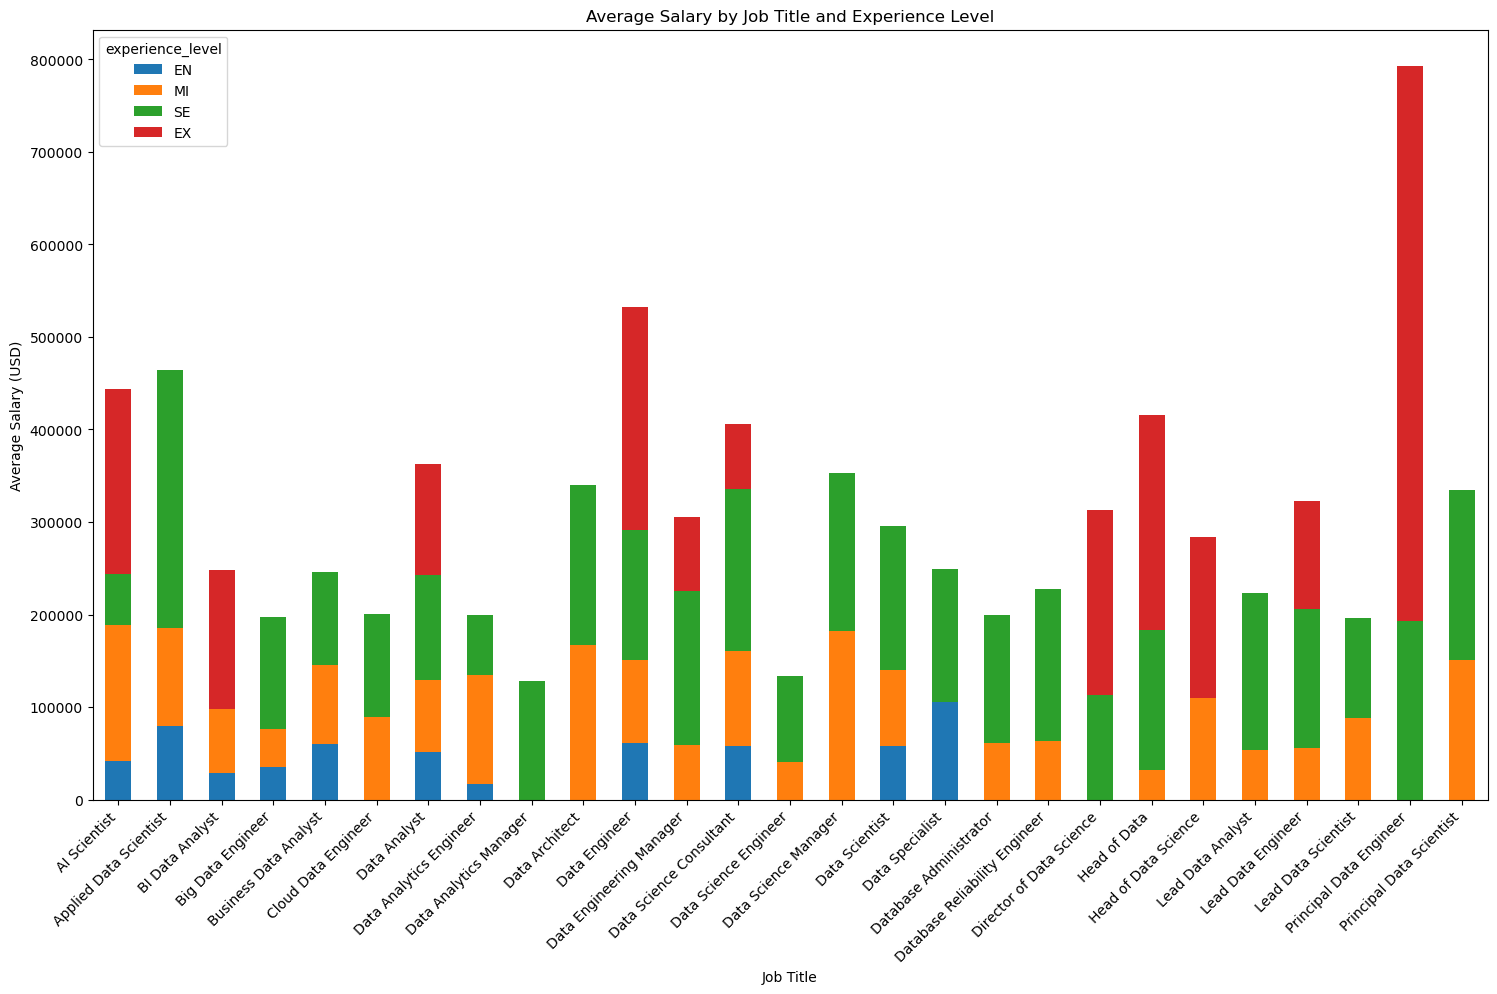

In [34]:
# Reset index to make job_title a regular column
avg_salary_by_job_exp = avg_salary_by_job_exp.reset_index()

# Pivot the table to prepare for plotting
pivoted_data = avg_salary_by_job_exp.pivot(index='job_title', columns='experience_level', values='salary_in_usd')

# Reorder the columns
pivoted_data = pivoted_data[['EN', 'MI', 'SE', 'EX']] 

# Plot a stacked bar chart
pivoted_data.plot(kind='bar', stacked=True, figsize=(18,10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Job Title and Experience Level')
plt.show()